In [280]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [281]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data.csv', sep = '\t', delimiter = None)

data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [282]:
# duplicate data
data_1 = data.copy()
# Remove major
data_1 = data_1.drop(['major', 'country', 'uniquenetworklocation', 'source'],axis=1)
# Remove time and position
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1 = data_1.drop(position,axis=1)
data_1 = data_1.drop(time,axis=1)
# remove introelapse, testelapse, surveyelapse
data_1 = data_1.drop(data_1.iloc[:,42:45],axis=1)
data_2 = data_1.copy()
# Remove VCL
# data_2 = data_2.drop(data_2.iloc[:,52:68],axis=1)
# data_2 = data_2.replace(to_replace=0,value=3)
# Rename Ten Item Personlaity code
data_2 = data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
#print('Shape',data_1.shape)
#print('Attributes',data_1.columns)
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 81)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'screensize', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize'],
      dtype='objec

In [283]:
pd.set_option('display.max_columns', None)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4


In [284]:
# Grouping age
def condition(x):
    if x <= 10:
        return 0 #'Under Age'
    if  10 <= x <= 16:
        return 1 #'Children'
    if 17 <= x <= 21:
        return 2 #'Teen'
    if 21 <= x <= 35:
        return 3 #'Adults'
    if 36 <= x <= 48:
        return 4 #'Elder Adults'
    if x >= 49:
        return 5 #'Older People'

data_2['AgeGroups'] = data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2


In [285]:
# Filter DAS
data_das = data_2.iloc[:,42:]
print('Attributes',data_das.columns)
data_3=data_2.filter(regex='Q\d{1,2}A')
print('Attributes',data_3.columns)
#data_3.head()

Attributes Index(['Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5',
       'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13',
       'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'hand', 'religion', 'orientation', 'race', 'voted',
       'married', 'familysize', 'AgeGroups'],
      dtype='object')
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A',

In [286]:
# Categorized DAS
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3 = sub(data_3)
das_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
d = []
for i in das_keys["Depression"]:
    d.append('Q'+str(i)+'A')
s = []
for i in das_keys["Stress"]:
    s.append('Q'+str(i)+'A')
a = []
for i in das_keys["Anxiety"]:
    a.append('Q'+str(i)+'A')
depression = data_3.filter(d)
stress = data_3.filter(s)
anxiety = data_3.filter(a)

In [287]:
# scoring system
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [288]:
#Dass Specification
# DAS set
display(depression.head(), stress.head(), anxiety.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [289]:
DEPRESSION = pd.merge(depression, data_das, how='inner', left_index=True, right_index=True)
ANXIETY = pd.merge(anxiety, data_das, how='inner', left_index=True, right_index=True)
STRESS = pd.merge(stress, data_das, how='inner', left_index=True, right_index=True)

# print('Attributes',DEPRESSION.columns)
display(DEPRESSION.head() , STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2


In [290]:
def depression_condition(x):
    if x <= 13:
        return 0 # normal
    if 14 <= x <= 20:
        return 1 # moderate
    if x >= 21:
        return 2 # severe

def anxiety_condition(x):
    if x <= 13:
        return 0 # normal
    if 14 <= x <= 20:
        return 1 # moderate
    if x >= 21:
        return 2 # severe

def stress_condition(x):
    if x <= 13:
        return 0 # normal
    if 14 <= x <= 20:
        return 1 # moderate
    if x >= 21:
        return 2 # severe

DEPRESSION['Condition'] = DEPRESSION['Total_Count'].apply(depression_condition)
ANXIETY['Condition'] = ANXIETY['Total_Count'].apply(anxiety_condition)
STRESS['Condition'] = STRESS['Total_Count'].apply(stress_condition)

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1,2
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1,2
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,2
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1,2
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1,2
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,1
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1,1
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2,2


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1,2
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1,1
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,0
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1,1
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2,2


In [291]:
# Simplified variable
data_depression=DEPRESSION.copy()
data_anxiety=ANXIETY.copy()
data_stress=STRESS.copy()

data_depression = data_depression.drop(columns=['Total_Count'])
data_anxiety = data_anxiety.drop(columns=['Total_Count'])
data_stress = data_stress.drop(columns=['Total_Count'])

display(data_depression.head(), data_anxiety.head(), data_stress.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1,2
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1,2
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,2
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1,1
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2,2


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1,2
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1,1
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,0
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1,1
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,12,1,10,2,1,2,1,2
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,2,7,0,70,2,1,4,1,2
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,1
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,2,4,5,70,2,1,5,1,1
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,3,10,1,10,2,1,4,2,2


In [292]:
print(data_depression['Condition'].value_counts())
print(data_anxiety['Condition'].value_counts())
print(data_stress['Condition'].value_counts())

2    20054
0    12642
1     7079
Name: Condition, dtype: int64
0    18182
2    12995
1     8598
Name: Condition, dtype: int64
2    20639
0    10569
1     8567
Name: Condition, dtype: int64


In [293]:

def ratainData(source):
    condition = {}
    for i in range(3):
        condition["source{i}"]=source.copy()
        condition["source{i}"]=condition["source{i}"][condition["source{i}"].Condition == i]
        globals()[f"final_source{i}"]=condition["source{i}"].iloc[:7000]

    final_source=pd.concat([final_source0,final_source1,final_source2])    
    return final_source

final_depression=ratainData(data_depression)
final_anxiety=ratainData(data_anxiety)
final_stress=ratainData(data_stress)
display(final_depression,final_anxiety,final_stress)
#test


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
5,1,2,1,0,3,1,0,1,0,1,0,1,1,1,2,1,6,1,7,7,7,2,6,7,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,3,2,2,20,2,1,4,1,70,2,1,4,2,0
7,0,2,0,0,0,0,0,0,1,0,0,0,0,1,7,6,4,5,3,2,6,3,5,2,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,4,2,2,2,29,2,1,2,2,60,1,1,2,3,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,6,1,6,5,3,2,7,2,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,3,2,1,1,34,2,1,1,1,60,1,3,2,3,0
16,1,0,0,2,0,2,0,1,3,0,0,0,0,2,1,7,5,7,1,6,5,4,1,3,1,1,0,1,1,0,0,1,0,1,0,0,0,1,1,1,2,2,2,2,19,2,1,7,1,60,2,1,2,2,0
20,1,1,1,2,0,1,0,0,2,0,1,0,0,1,7,1,3,6,6,1,7,6,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,2,1,15,2,1,4,1,60,2,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,0,2,2,2,2,3,1,1,3,1,3,1,1,3,7,6,2,7,7,1,7,7,1,1,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,1,3,2,1,17,2,1,9,5,60,2,1,2,2,2
13812,2,2,2,3,3,3,2,3,3,1,2,1,3,3,4,5,3,7,2,6,7,6,2,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,3,2,1,13,2,1,10,3,20,2,2,2,1,2
13814,3,3,3,3,3,3,1,2,3,2,3,3,1,3,6,6,4,5,6,2,7,5,3,4,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,21,2,1,4,1,10,1,1,3,2,2
13815,2,1,3,3,2,3,3,2,3,3,3,1,3,3,1,7,7,7,6,6,6,7,2,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,3,2,3,2,21,1,1,2,4,60,1,1,1,2,2


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,4,3,60,1,1,3,2,0
5,0,0,0,2,1,0,1,0,0,0,1,1,0,0,2,1,6,1,7,7,7,2,6,7,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,3,2,2,20,2,1,4,1,70,2,1,4,2,0
7,0,0,1,0,1,0,1,0,1,0,0,0,0,0,7,6,4,5,3,2,6,3,5,2,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,4,2,2,2,29,2,1,2,2,60,1,1,2,3,0
10,0,0,0,0,1,0,0,0,0,0,1,0,0,0,5,3,6,6,3,4,4,7,5,7,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,2,1,1,15,1,1,6,1,60,2,1,1,1,0
12,0,0,0,0,0,3,1,0,0,0,2,1,1,2,5,1,4,6,5,5,7,6,2,1,1,1,0,0,1,0,0,1,0,1,0,0,1,1,1,1,3,0,2,1,20,1,1,1,1,60,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22040,1,2,2,3,1,1,3,1,2,2,2,3,3,2,5,5,6,7,5,7,7,7,5,5,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,2,3,2,1,26,1,1,10,0,10,1,1,3,3,2
22041,3,3,3,3,3,3,3,3,2,3,3,3,3,3,4,7,4,7,7,7,4,7,6,4,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1,1,3,3,2,2,23,1,1,6,1,10,1,1,4,3,2
22043,3,1,2,3,1,1,3,1,2,3,3,3,3,2,4,3,4,6,4,4,5,5,3,6,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,3,3,2,2,19,1,1,10,5,10,2,1,7,2,2
22047,3,3,1,3,3,3,3,1,3,3,3,3,3,1,5,7,5,7,5,7,7,0,5,5,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,2,1,2,1,19,1,2,10,3,70,2,1,4,2,2


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,hand,religion,orientation,race,voted,married,familysize,AgeGroups,Condition
5,0,0,2,0,1,2,0,0,0,2,0,3,2,0,2,1,6,1,7,7,7,2,6,7,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,3,2,2,20,2,1,4,1,70,2,1,4,2,0
7,0,1,0,1,0,1,1,0,1,0,0,0,0,1,7,6,4,5,3,2,6,3,5,2,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,4,2,2,2,29,2,1,2,2,60,1,1,2,3,0
13,0,0,2,1,0,0,2,2,1,2,1,1,0,1,5,2,5,5,2,6,7,6,6,2,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,4,2,1,2,31,2,1,12,1,60,2,1,5,3,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,6,1,6,5,3,2,7,2,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,3,2,1,1,34,2,1,1,1,60,1,3,2,3,0
17,2,2,1,1,0,1,1,0,1,0,1,0,1,1,1,4,4,0,7,5,4,4,3,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,3,2,1,18,1,1,12,1,60,2,1,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,3,1,3,3,2,1,0,1,3,3,3,1,3,3,4,4,5,7,5,7,5,5,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,2,2,19,1,1,7,0,10,2,1,4,2,2
13560,1,2,2,2,3,1,0,2,1,2,2,2,0,2,5,6,6,7,6,7,5,4,3,3,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,0,2,2,1,20,2,1,12,5,50,1,1,4,2,2
13561,3,3,3,3,3,3,3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,1,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,3,2,1,13,1,1,4,5,30,2,1,2,1,2
13562,2,2,2,2,2,2,3,1,2,2,2,2,1,2,2,4,4,5,3,6,5,5,3,4,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,16,1,1,5,1,60,2,1,1,1,2


In [294]:
print(final_depression.loc[5])
print(final_anxiety.loc[5])

Q3A                                 1
Q5A                                 2
Q10A                                1
Q13A                                0
Q16A                                3
Q17A                                1
Q21A                                0
Q24A                                1
Q26A                                0
Q31A                                1
Q34A                                0
Q37A                                1
Q38A                                1
Q42A                                1
Extraverted-enthusiastic            2
Critical-quarrelsome                1
Dependable-self_disciplined         6
Anxious-easily upset                1
Open to new experiences-complex     7
Reserved-quiet                      7
Sympathetic-warm                    7
Disorganized-careless               2
Calm-emotionally_stable             6
Conventional-uncreative             7
VCL1                                1
VCL2                                1
VCL3        

In [295]:
# # Ngeratain condition depresi
# data_depression_test_0=data_depression.copy()
# data_depression_test_1=data_depression.copy()
# data_depression_test_2=data_depression.copy()

# data_depression_test_0=data_depression_test_0[data_depression_test_0.Condition == 0]
# data_depression_test_0=data_depression_test_0.iloc[:7000]

# data_depression_test_1=data_depression_test_1[data_depression_test_1.Condition == 1]
# data_depression_test_1=data_depression_test_1.iloc[:7000]

# data_depression_test_2=data_depression_test_2[data_depression_test_2.Condition == 2]
# data_depression_test_2=data_depression_test_2.iloc[:7000]

# #display(data_depression_test_0,data_depression_test_1,data_depression_test_2)
# result_depression=pd.concat([data_depression_test_0,data_depression_test_1,data_depression_test_2])

# # ngeratain condition anxiety
# data_anxiety_test_0=data_anxiety.copy()
# data_anxiety_test_1=data_anxiety.copy()
# data_anxiety_test_2=data_anxiety.copy()

# data_anxiety_test_0=data_anxiety_test_0[data_anxiety_test_0.Condition == 0]
# data_anxiety_test_0=data_anxiety_test_0.iloc[:7000]

# data_anxiety_test_1=data_anxiety_test_1[data_anxiety_test_1.Condition == 1]
# data_anxiety_test_1=data_anxiety_test_1.iloc[:7000]

# data_anxiety_test_2=data_anxiety_test_2[data_anxiety_test_2.Condition == 2]
# data_anxiety_test_2=data_anxiety_test_2.iloc[:7000]

# #display(data_depression_test_0,data_depression_test_1,data_depression_test_2)
# result_anxiety=pd.concat([data_anxiety_test_0,data_anxiety_test_1,data_anxiety_test_2])

# display(result_depression,result_anxiety)

In [296]:
print(final_depression['Condition'].value_counts())
print(final_anxiety['Condition'].value_counts())
print(final_anxiety['Condition'].value_counts())

0    7000
1    7000
2    7000
Name: Condition, dtype: int64
0    7000
1    7000
2    7000
Name: Condition, dtype: int64
0    7000
1    7000
2    7000
Name: Condition, dtype: int64


# NEURAL NETWORK

In [297]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [298]:
print(final_depression.iloc[:,-1:])
print(final_anxiety.iloc[:,-1:])
print(final_stress.iloc[:,-1:])

       Condition
5              0
7              0
14             0
16             0
20             0
...          ...
13810          2
13812          2
13814          2
13815          2
13816          2

[21000 rows x 1 columns]
       Condition
2              0
5              0
7              0
10             0
12             0
...          ...
22040          2
22041          2
22043          2
22047          2
22049          2

[21000 rows x 1 columns]
       Condition
5              0
7              0
13             0
14             0
17             0
...          ...
13558          2
13560          2
13561          2
13562          2
13563          2

[21000 rows x 1 columns]


In [299]:
X_Depression = final_depression.iloc[:,0:54].values
y_Depression = final_depression.iloc[:,-1:].values

X_Anxiety = final_anxiety.iloc[:,0:54].values
y_Anxiety = final_anxiety.iloc[:,-1:].values

X_Stress = final_stress.iloc[:,0:54].values
y_Stress = final_stress.iloc[:,-1:].values

print(X_Depression)
print(y_Depression)

print(X_Anxiety)
print(y_Anxiety)

print(X_Stress)
print(y_Stress)

[[1 2 1 ... 1 4 2]
 [0 2 0 ... 1 2 3]
 [0 0 0 ... 3 2 3]
 ...
 [3 3 3 ... 1 3 2]
 [2 1 3 ... 1 1 2]
 [3 1 3 ... 3 2 5]]
[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]
[[0 0 0 ... 1 3 2]
 [0 0 0 ... 1 4 2]
 [0 0 1 ... 1 2 3]
 ...
 [3 1 2 ... 1 7 2]
 [3 3 1 ... 1 4 2]
 [2 1 2 ... 1 6 2]]
[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]
[[0 0 2 ... 1 4 2]
 [0 1 0 ... 1 2 3]
 [0 0 2 ... 1 5 3]
 ...
 [3 3 3 ... 1 2 1]
 [2 2 2 ... 1 1 1]
 [3 2 2 ... 1 8 3]]
[[0]
 [0]
 [0]
 ...
 [2]
 [2]
 [2]]


In [300]:
# from sklearn.preprocessing import LabelEncoder
# lb = LabelEncoder()
# #Y_Depression = pd.get_dummies(y_Depression).values
# Y_Depression = lb.fit_transform(y_Depression)
# #X_Depression = lb.fit_transform(X_Depression)
# #Y_Depression = Y_Depression.transpose()

# #Y_Stress = pd.get_dummies(y_Stress).values
# #Y_Anxiety = pd.get_dummies(y_Anxiety).values

# #Y_Depression=y_Depression

# #print(Y_Depression[0:6])
# #print(Y_Stress[0:6])
# #print(Y_Anxiety[0:6])
# print(Y_Depression)

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

scaler=MinMaxScaler()

X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_Depression, y_Depression, test_size=0.3, random_state=0)
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_Anxiety, y_Anxiety, test_size=0.3, random_state=0)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_Stress, y_Stress, test_size=0.3, random_state=0)

X_train_depression = scaler.fit_transform(X_train_depression)
X_test_depression = scaler.transform(X_test_depression)
X_train_anxiety = scaler.fit_transform(X_train_anxiety)
X_test_anxiety = scaler.transform(X_test_anxiety)
X_train_stress = scaler.fit_transform(X_train_stress)
X_test_stress = scaler.transform(X_test_stress)

print(y_train_depression.shape,y_test_depression.shape,X_train_depression.shape,X_test_depression.shape)
print(y_train_anxiety.shape,y_test_anxiety.shape,X_train_anxiety.shape,X_test_anxiety.shape)
print(y_train_stress.shape,y_test_stress.shape,X_train_stress.shape,X_test_stress.shape)

(14700, 1) (6300, 1) (14700, 54) (6300, 54)
(14700, 1) (6300, 1) (14700, 54) (6300, 54)
(14700, 1) (6300, 1) (14700, 54) (6300, 54)


In [305]:
#Depression Model
model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(512, activation = 'relu',input_shape=(54,), name ="Input"), #input_shape=[15]
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dense(7, activation='softmax', name="layer3")
    tf.keras.layers.Dense(3, activation='softmax', name="Condition")
  ])

model.summary()



Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 512)               28160     
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 Condition (Dense)           (None, 3)                 771       
                                                                 
Total params: 160,259
Trainable params: 160,259
Non-trainable params: 0
_________________________________________________________________


In [306]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),     #SparseCategoricalCrossentropy
              metrics=['accuracy'])

historydep = model.fit(X_train_depression, y_train_depression, batch_size=32, epochs=20)

historyanx = model.fit(X_train_anxiety, y_train_anxiety, batch_size=32, epochs=20)

historystr = model.fit(X_train_stress, y_train_stress, batch_size=32, epochs=20)

Epoch 1/20


C:\Users\muham\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


460/460 [==============================] - 2s 3ms/step - loss: 0.1749 - accuracy: 0.9321
Epoch 2/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.9602
Epoch 3/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0817 - accuracy: 0.9659
Epoch 4/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0760 - accuracy: 0.9686
Epoch 5/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0676 - accuracy: 0.9735
Epoch 6/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0601 - accuracy: 0.9763
Epoch 7/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0506 - accuracy: 0.9800
Epoch 8/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9784
Epoch 9/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9826
Epoch 10/20
460/460 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9827
Epoch 11/2

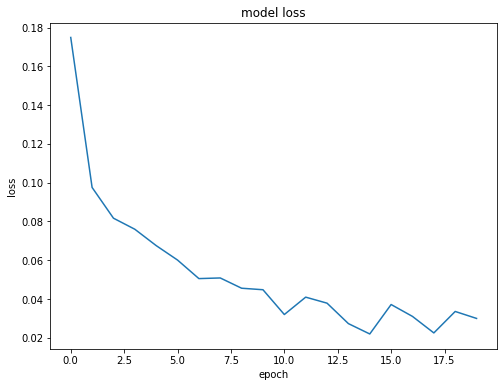

In [307]:
from matplotlib.pyplot import figure

figure(figsize = (8,6))
plt.plot(historydep.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [317]:
from sklearn import preprocessing

index=7000
X_hasil_depression = final_depression.copy()
X_hasil_depression=X_hasil_depression = X_hasil_depression.iloc[:,0:54]#.values
X_hasil_depression=X_hasil_depression.loc[index].values
X_hasil_depression=np.array(X_hasil_depression).astype('float32').reshape((1,-1))
print(X_hasil_depression, final_depression.loc[index,["Condition"]])

X_hasil_anxiety = final_anxiety.copy()
X_hasil_anxiety=X_hasil_anxiety = X_hasil_anxiety.iloc[:,0:54]#.values
X_hasil_anxiety=X_hasil_anxiety.loc[index].values
X_hasil_anxiety=np.array(X_hasil_anxiety).astype('float32').reshape((1,-1))
print(X_hasil_anxiety, final_anxiety.loc[index,["Condition"]])

X_hasil_stress = final_stress.copy()
X_hasil_stress=X_hasil_stress = X_hasil_stress.iloc[:,0:54]#.values
X_hasil_stress=X_hasil_stress.loc[index].values
X_hasil_stress=np.array(X_hasil_stress).astype('float32').reshape((1,-1))
print(X_hasil_stress, final_stress.loc[index,["Condition"]])

[[ 1.  1.  0.  2.  1.  1.  0.  1.  2.  2.  0.  0.  1.  1.  1.  5.  6.  5.
   3.  5.  7.  1.  6.  3.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.
   0.  1.  1.  1.  3.  3.  2.  1. 20.  1.  2.  4.  1. 60.  1.  1.  3.  2.]] Condition    0
Name: 7000, dtype: int64
[[ 1.  0.  0.  3.  0.  0.  0.  0.  0.  1.  1.  0.  1.  0.  1.  5.  6.  5.
   3.  5.  7.  1.  6.  3.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.
   0.  1.  1.  1.  3.  3.  2.  1. 20.  1.  2.  4.  1. 60.  1.  1.  3.  2.]] Condition    0
Name: 7000, dtype: int64
[[ 0.  2.  2.  1.  2.  1.  0.  2.  1.  2.  0.  1.  0.  1.  1.  5.  6.  5.
   3.  5.  7.  1.  6.  3.  1.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.
   0.  1.  1.  1.  3.  3.  2.  1. 20.  1.  2.  4.  1. 60.  1.  1.  3.  2.]] Condition    1
Name: 7000, dtype: int64


In [318]:

#probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

hasil_akhir_depression = model.predict(X_hasil_depression)
hasil_akhir_anxiety = model.predict(X_hasil_anxiety)
hasil_akhir_stress = model.predict(X_hasil_stress)

#print('Tingkat depresi: ',hasil_akhir_stress)
print('Tingkat depresi: ',np.argmax(hasil_akhir_depression))
print('Tingkat anxiety: ',np.argmax(hasil_akhir_anxiety))
print('Tingkat stress: ',np.argmax(hasil_akhir_stress))

1/1 [==============================] - 0s 29ms/step
Tingkat depresi:  0
Tingkat anxiety:  0
Tingkat stress:  0
